# Week 9 Information processing in complex systems

## 3. Activity: Engaging with intuition on information storage   

In this activity we will use our intuition to build models of how the past of a time-series process can be used to provide information about the next value of the process. For each of the following time-series plots (time index is n), consider the following questions:

1) Try to predict the next value of the variable (beyond what is shown).
2) What assumptions did you make about that time-series process?
3) Where specifically did you take the information from to make that prediction? I.e. given your assumptions about the temporal pattern of the process, which previous values are informative about which phase of the pattern you are in and what is coming next?
4) Can you quantify how much information you got from the past about the next value? (Be precise where you can, or else refer to bounds or comparisons of the amount of information with other examples here)

# 5. Activity: Active information storage with JIDT   

In this activity we will write some simple code to calculate AIS on sample data.
Start by opening the AutoAnalyser and selecting Active Information Storage. 
Select a Discrete estimator, data file 2CoupledBinaryUseK2.txt. and tick Add stat. signif.?". Click Generate Code and Compute.
Find the generated code file GeneratedCalculator.m in demos/AutoAnalyser, rename it (so it doesn't get overwritten later), and open this text file for editing (on Windows open in Wordpad).
Replace the loaded data in variable with the following line.
variable = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0];

In [2]:
from jpype import startJVM, getDefaultJVMPath, JArray, JInt, JPackage, shutdownJVM, isJVMStarted
import numpy as np
import sys
# Our python data file readers are a bit of a hack, python users will do better on this:
sys.path.append("/home/jovyan/notebooks/jidt/demos/python")
import readIntsFile

# Add JIDT jar library to the path
jarLocation = "/home/jovyan/notebooks/jidt/infodynamics.jar"
# Start the JVM (add the "-Xmx" option with say 1024M if you get crashes due to not enough memory space)
if (not isJVMStarted()):
    startJVM(getDefaultJVMPath(), "-ea", "-Djava.class.path=" + jarLocation)

In [3]:
# source

source_p = np.array([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])
source = JArray(JInt, 1)(source_p.tolist())

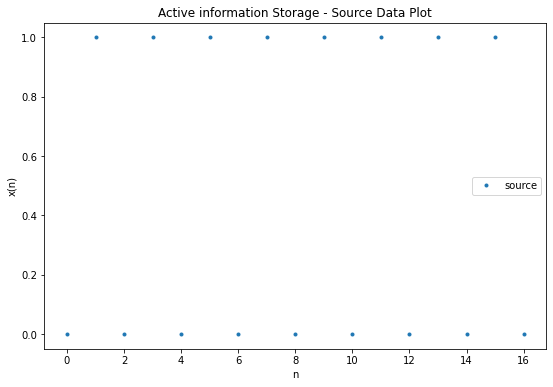

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
axs.plot(source_p, '.', label='source')
axs.set_title('Active information Storage - Source Data Plot')
axs.set_ylabel('x(n)')
axs.set_xlabel('n')
plt.legend()
plt.show()

In [6]:
history_k=1

In [9]:
def activeInformationStorage(source, history_k):
    # 1. Construct the calculator:
    calcClass = JPackage("infodynamics.measures.discrete").ActiveInformationCalculatorDiscrete
    calc = calcClass(2, history_k)
    # 2. No other properties to set for discrete calculators.
    # 3. Initialise the calculator for (re-)use:
    calc.initialise()
    # 4. Supply the sample data:
    calc.addObservations(source)
    # 5. Compute the estimate:
    result = calc.computeAverageLocalOfObservations()
    # 6. Compute the (statistical significance via) null distribution empirically (e.g. with 100 permutations):
    measDist = calc.computeSignificance(100)
    print("AIS_Discrete(col_0) = %.4f bits (null: %.4f +/- %.4f std dev.; p(surrogate > measured)=%.5f from %d surrogates)" %
    (result, measDist.getMeanOfDistribution(), measDist.getStdOfDistribution(), measDist.pValue, 100))
    return result, measDist


In [15]:
# source

javaIntList = lambda l : JArray(JInt, 1)(l)
source1=javaIntList([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])
source2=javaIntList([0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0])
source3=javaIntList([0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0])   # can we talk about information storage in % for discrete alphabets?
                                                            # if AIS gives us 100% certainty is it another way to say that the system is periodic?
source4=javaIntList([0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1])

print('source1: ')
result1, measDist1 = activeInformationStorage(source1, history_k)
print('source2: ')
result21, measDist21 = activeInformationStorage(source2, 1)
result22, measDist22 = activeInformationStorage(source2, 2)
print('source3: ')
result31, measDist31 = activeInformationStorage(source3, 1)
result32, measDist32 = activeInformationStorage(source3, 2)
result33, measDist33 = activeInformationStorage(source3, 3)
result34, measDist34 = activeInformationStorage(source3, 4)
print('source4: ')
result41, measDist41 = activeInformationStorage(source4, 1)
result42, measDist42 = activeInformationStorage(source4, 2)
result43, measDist43 = activeInformationStorage(source4, 3)
result44, measDist44 = activeInformationStorage(source4, 4)
_,_ = activeInformationStorage(source4, 5)
_,_ = activeInformationStorage(source4, 6)
_,_ = activeInformationStorage(source4, 7)
_,_ = activeInformationStorage(source4, 8)


source1: 
AIS_Discrete(col_0) = 1.0000 bits (null: 0.0486 +/- 0.0689 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
source2: 
AIS_Discrete(col_0) = 0.0022 bits (null: 0.0460 +/- 0.0749 std dev.; p(surrogate > measured)=1.00000 from 100 surrogates)
AIS_Discrete(col_0) = 1.0000 bits (null: 0.1881 +/- 0.1419 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
source3: 
AIS_Discrete(col_0) = 0.0929 bits (null: 0.0456 +/- 0.0504 std dev.; p(surrogate > measured)=0.27000 from 100 surrogates)
AIS_Discrete(col_0) = 0.2624 bits (null: 0.1144 +/- 0.0932 std dev.; p(surrogate > measured)=0.12000 from 100 surrogates)
AIS_Discrete(col_0) = 0.8113 bits (null: 0.1638 +/- 0.1058 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 0.7219 bits (null: 0.1918 +/- 0.1045 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
source4: 
AIS_Discrete(col_0) = 0.1389 bits (null: 0.0554 +/- 0.0811 std dev.; p(surrogate > measured)=0.26000 from 

In [ ]:
## QUESTION: AIS over bigger k should be >= AIS over smaller k, if not this is due to statistical deviations ... ??? correct?

No handles with labels found to put in legend.


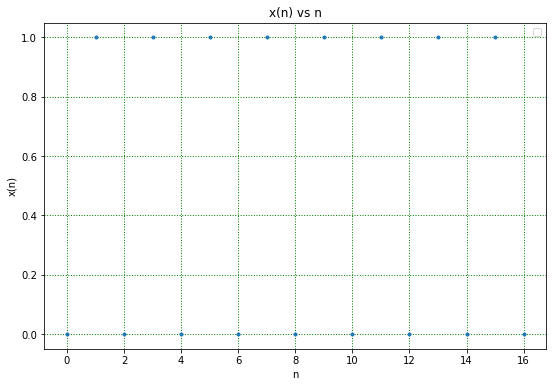

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
axs.plot(source_p, '.')
axs.set_title('x(n) vs n')
axs.set_ylabel('x(n)')
axs.set_xlabel('n')
axs.grid(color='g', linestyle='dotted', linewidth=1)
plt.legend()
plt.show()

In [39]:


def AIS(source, history_k):
    # 1. Construct the calculator:
    calcClass = JPackage("infodynamics.measures.discrete").ActiveInformationCalculatorDiscrete
    calc = calcClass(2, history_k)
    # 2. No other properties to set for discrete calculators.
    # 3. Initialise the calculator for (re-)use:
    calc.initialise()
    # 4. Supply the sample data:
    calc.addObservations(source)
    # 5. Compute the estimate:
    result = calc.computeAverageLocalOfObservations()
    # 6. Compute the (statistical significance via) null distribution empirically (e.g. with 100 permutations):
    measDist = calc.computeSignificance(100)

    print("AIS_Discrete(col_0) = %.4f bits (null: %.4f +/- %.4f std dev.; p(surrogate > measured)=%.5f from %d surrogates)" %
    (result, measDist.getMeanOfDistribution(), measDist.getStdOfDistribution(), measDist.pValue, 100))
    bias = measDist.getMeanOfDistribution()

    result_p = float(result)
    bias_p = float(bias)

    return result_p, result_p - bias_p
    

In [40]:
# source

source1_p = np.array([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])
source1 = JArray(JInt, 1)(source_p.tolist())

variable = [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0]
source2 = JArray(JInt, 1)(variable)
variable = [0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0]
source3 = JArray(JInt, 1)(variable)
variable = [0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1]
source4 = JArray(JInt, 1)(variable)

source=source4

In [46]:
def plot_ais_vs_k(source):
    ais_discretes=[]
    ais_corrected_discretes=[]
    ais_discretes.append(0)
    ais_corrected_discretes.append(0)
    ks=range(1,10)

    for k in ks:
        result, result_corrected = AIS(source, k)
        ais_discretes.append(result)
        ais_corrected_discretes.append(result_corrected)

    fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
    axs.plot(ais_discretes,  label = 'Ax')
    axs.plot(ais_corrected_discretes, label = 'Ax corrected')
    axs.set_title('AIS(k) vs k')
    axs.set_ylabel('AIS Discrete')
    axs.set_xlabel('history length k')
    axs.grid(color='g', linestyle='dotted', linewidth=1)
    plt.legend()
    plt.show()

AIS_Discrete(col_0) = 1.0000 bits (null: 0.0449 +/- 0.0682 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 0.9968 bits (null: 0.0520 +/- 0.0603 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 1.0000 bits (null: 0.0635 +/- 0.0890 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 0.9957 bits (null: 0.0564 +/- 0.0756 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 1.0000 bits (null: 0.0629 +/- 0.0885 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 0.9940 bits (null: 0.0686 +/- 0.1112 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 1.0000 bits (null: 0.0686 +/- 0.1243 std dev.; p(surrogate > measured)=0.01000 from 100 surrogates)
AIS_Discrete(col_0) = 0.9911 bits (null: 0.0893 +/- 0.1274 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 1.

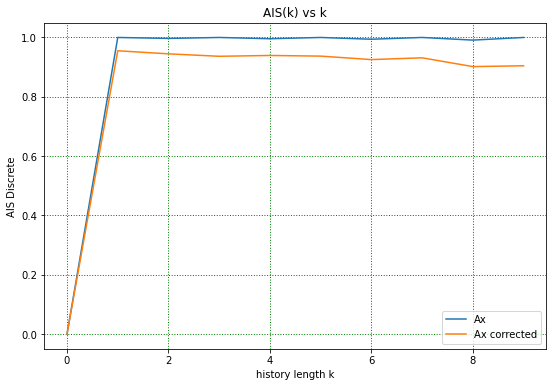

In [47]:
plot_ais_vs_k(source1)

AIS_Discrete(col_0) = 0.0022 bits (null: 0.0437 +/- 0.0689 std dev.; p(surrogate > measured)=1.00000 from 100 surrogates)
AIS_Discrete(col_0) = 1.0000 bits (null: 0.1784 +/- 0.1478 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 0.9968 bits (null: 0.1727 +/- 0.1416 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 0.9852 bits (null: 0.2200 +/- 0.1608 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 0.9957 bits (null: 0.2366 +/- 0.1869 std dev.; p(surrogate > measured)=0.01000 from 100 surrogates)
AIS_Discrete(col_0) = 1.0000 bits (null: 0.2332 +/- 0.2017 std dev.; p(surrogate > measured)=0.01000 from 100 surrogates)
AIS_Discrete(col_0) = 0.9940 bits (null: 0.2914 +/- 0.2192 std dev.; p(surrogate > measured)=0.01000 from 100 surrogates)
AIS_Discrete(col_0) = 0.9710 bits (null: 0.3069 +/- 0.2109 std dev.; p(surrogate > measured)=0.01000 from 100 surrogates)
AIS_Discrete(col_0) = 0.

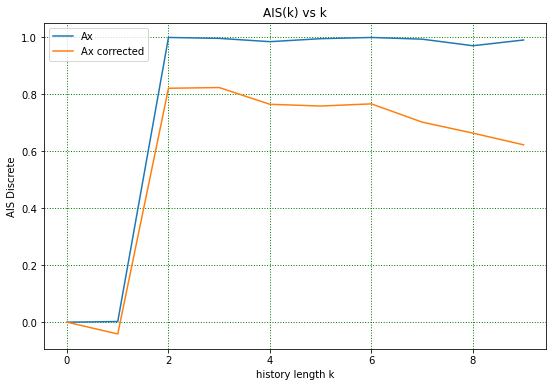

In [48]:
plot_ais_vs_k(source2)

AIS_Discrete(col_0) = 0.0929 bits (null: 0.0525 +/- 0.0566 std dev.; p(surrogate > measured)=0.42000 from 100 surrogates)
AIS_Discrete(col_0) = 0.2624 bits (null: 0.1115 +/- 0.0841 std dev.; p(surrogate > measured)=0.10000 from 100 surrogates)
AIS_Discrete(col_0) = 0.8113 bits (null: 0.2103 +/- 0.1269 std dev.; p(surrogate > measured)=0.01000 from 100 surrogates)
AIS_Discrete(col_0) = 0.7219 bits (null: 0.1887 +/- 0.0986 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 0.7496 bits (null: 0.2120 +/- 0.1168 std dev.; p(surrogate > measured)=0.01000 from 100 surrogates)
AIS_Discrete(col_0) = 0.7793 bits (null: 0.2282 +/- 0.1235 std dev.; p(surrogate > measured)=0.01000 from 100 surrogates)
AIS_Discrete(col_0) = 0.8113 bits (null: 0.2373 +/- 0.1154 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)
AIS_Discrete(col_0) = 0.6840 bits (null: 0.2702 +/- 0.1077 std dev.; p(surrogate > measured)=0.01000 from 100 surrogates)
AIS_Discrete(col_0) = 0.

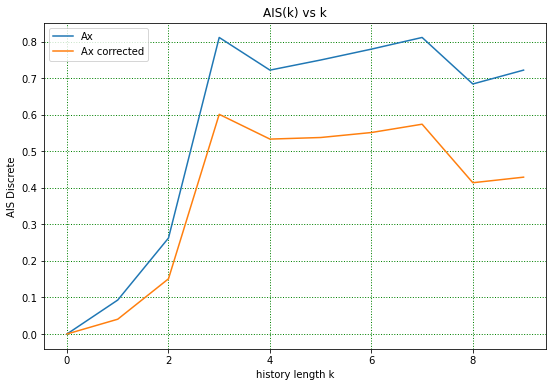

In [49]:
plot_ais_vs_k(source3)

AIS_Discrete(col_0) = 0.1389 bits (null: 0.0553 +/- 0.0642 std dev.; p(surrogate > measured)=0.28000 from 100 surrogates)
AIS_Discrete(col_0) = 0.1556 bits (null: 0.1302 +/- 0.1139 std dev.; p(surrogate > measured)=0.33000 from 100 surrogates)
AIS_Discrete(col_0) = 0.2027 bits (null: 0.2491 +/- 0.1170 std dev.; p(surrogate > measured)=0.64000 from 100 surrogates)
AIS_Discrete(col_0) = 0.3210 bits (null: 0.3901 +/- 0.1346 std dev.; p(surrogate > measured)=0.77000 from 100 surrogates)
AIS_Discrete(col_0) = 0.6255 bits (null: 0.4793 +/- 0.1282 std dev.; p(surrogate > measured)=0.29000 from 100 surrogates)
AIS_Discrete(col_0) = 0.6446 bits (null: 0.5179 +/- 0.1404 std dev.; p(surrogate > measured)=0.36000 from 100 surrogates)
AIS_Discrete(col_0) = 0.6635 bits (null: 0.6163 +/- 0.1333 std dev.; p(surrogate > measured)=0.61000 from 100 surrogates)
AIS_Discrete(col_0) = 0.6813 bits (null: 0.6933 +/- 0.1328 std dev.; p(surrogate > measured)=0.81000 from 100 surrogates)
AIS_Discrete(col_0) = 0.

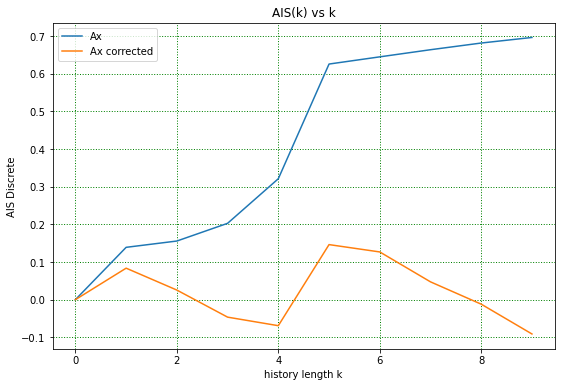

In [51]:
plot_ais_vs_k(source4)

  # Activity 6 Local information storage